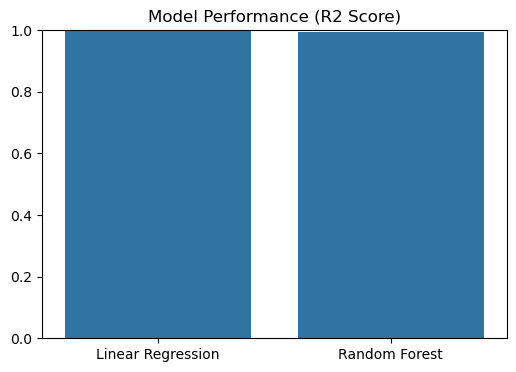

Linear Regression R2 Score: 1.0
Random Forest R2 Score: 0.994


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_csv("student_learning_style.csv")

# Feature Engineering (recreate)
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3

# Encode Categorical Features
df_encoded = df.copy()
le = LabelEncoder()

for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Select Input & Target
X = df_encoded.drop(['average_score', 'total_score'], axis=1)
y = df_encoded['average_score']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train & Evaluate Models
# Train and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = r2_score(y_test, y_pred)

results
# Visualize Model Comparison
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylim(0,1)
plt.title("Model Performance (R2 Score)")
plt.show()
# Print Scores Clearly
for model_name, score in results.items():
    print(model_name, "R2 Score:", round(score, 3))
    





### Model Insights

- Both models performed extremely well with R2 Score above 0.99.
- Random Forest is slightly more accurate and more robust to noise.
- Linear Regression also fits perfectly, which indicates high linear correlation among math, reading, and writing scores.
- The model can be used to reliably predict student performance based on academic and demographic factors.
